In [1]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime
import gzip
import matplotlib.gridspec as gridspec

from spacepy import coordinates as coord
from spacepy.time import Ticktock

from methods.raytracer_utils import readdump, read_rayfile, read_rayfiles
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec


import methods.xflib as xflib

from methods.index_helpers import load_TS_params
from methods.index_helpers import load_Dst
from methods.index_helpers import load_Kp
from methods.index_helpers import load_ae
from methods.index_helpers import Kp_at
from methods.index_helpers import Ae_at

xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/Thesis figures/methods/libxformd.so')

R2D = 180./np.pi
D2R = np.pi/180.
%matplotlib inline
# %matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2
# --------------- Latex Plot Beautification --------------------------
fig_width = 12 
fig_height = 8
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 18,
          'font.size': 18,
          'legend.fontsize': 18,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

In [4]:
project_root = '/shared/users/asousa/WIPP/Thesis figures/'
ray_bin_dir = '/shared/users/asousa/software/raytracer_DP/bin/'
planes = ['XY', 'XZ', 'YZ']
ray_datenum = datetime.datetime(2010,1,1,0,0,0)
# ngo_file = '/shared/users/asousa/WIPP/raymaker/ngo_infile.in'
ngo_file = 'ngo_kp2.in' #newray.in'
modelnum = 1
use_IGRF = 0
maxD = 8
R_E = 6371

os.chdir(ray_bin_dir)  # GCPM mode requires all the data files to be in the same directory
for Kp in [2]:#, 2, 4, 6, 8]:
    for plane in planes:
        # plane = row[1]

        Pdyn, ByIMF, BzIMF, W = load_TS_params(ray_datenum)
        Dst = load_Dst(ray_datenum)
        # Load Kp
    #     Kp = 8 #Kp_at(ray_datenum)
        # Load Ae
        AE = Ae_at(ray_datenum)

        yearday = '%d%03d'%(ray_datenum.year, ray_datenum.timetuple().tm_yday)
        milliseconds_day = (ray_datenum.second + ray_datenum.minute*60 + ray_datenum.hour*60*60)*1e3 + ray_datenum.microsecond*1e-3



        if plane=='XZ':
            minx = -maxD*R_E*1e3
            maxx = maxD*R_E*1e3
            miny = 0
            maxy = 0
            minz = -maxD*R_E*1e3
            maxz = maxD*R_E*1e3
            nx = 200
            ny = 1
            nz = 200
        if plane=='XY':
            minx = -maxD*R_E*1e3
            maxx = maxD*R_E*1e3
            miny = -maxD*R_E*1e3
            maxy = maxD*R_E*1e3
            minz = 0
            maxz = 0
            nx = 200
            ny = 200
            nz = 1
        if plane=='YZ':    
            minx = 0
            maxx = 0
            miny = -maxD*R_E*1e3
            maxy = maxD*R_E*1e3
            minz = -maxD*R_E*1e3
            maxz = maxD*R_E*1e3
            nx = 1
            ny = 200
            nz = 200


        model_outfile='model_dump_mode%d_Kp%d_%s_%d_%s.dat'%(modelnum, Kp, yearday, milliseconds_day, plane)
#         print model_outfile
        cmd = '%s '%os.path.join(ray_bin_dir, 'dumpmodel') +\
                ' --modelnum=%d --yearday=%s --milliseconds_day=%d '%(modelnum, yearday, milliseconds_day) + \
                '--minx=%g --maxx=%g '%(minx, maxx) +\
                '--miny=%g --maxy=%g '%(miny, maxy) +\
                '--minz=%g --maxz=%g '%(minz, maxz) +\
                '--nx=%g --ny=%g --nz=%g '%(nx, ny, nz) +\
                '--filename=%s '%(model_outfile) +\
                '--ngo_configfile=%s '%ngo_file +\
                '--use_igrf=%g --use_tsyganenko=%g '%(use_IGRF,0) +\
                '--tsyganenko_Pdyn=%g '%(Pdyn) +\
                '--tsyganenko_Dst=%g '%(Dst) +\
                '--tsyganenko_ByIMF=%g '%(ByIMF) +\
                '--tsyganenko_BzIMF=%g '%(BzIMF) +\
                '--tsyganenko_W1=%g '%(W[0]) +\
                '--tsyganenko_W2=%g '%(W[1]) +\
                '--tsyganenko_W3=%g '%(W[2]) +\
                '--tsyganenko_W4=%g '%(W[3]) +\
                '--tsyganenko_W5=%g '%(W[4]) +\
                '--tsyganenko_W6=%g '%(W[5]) +\
                '--kp=%g '%(Kp) +\
                '--gcpm_kp=%g '%(Kp) +\
                '--fixed_MLT=0 ' +\
                '--mag_coords=0 '

        print cmd

        os.system(cmd)
        print     'cp \'%s\' %s\''%(model_outfile, os.path.join(project_root, model_outfile))
        os.system('cp \'%s\' \'%s\''%(model_outfile, os.path.join(project_root, model_outfile)))


/shared/users/asousa/software/raytracer_DP/bin/dumpmodel  --modelnum=1 --yearday=2010001 --milliseconds_day=0 --minx=-5.0968e+07 --maxx=5.0968e+07 --miny=-5.0968e+07 --maxy=5.0968e+07 --minz=0 --maxz=0 --nx=200 --ny=200 --nz=1 --filename=model_dump_mode1_Kp2_2010001_0_XY.dat --ngo_configfile=ngo_kp2.in --use_igrf=0 --use_tsyganenko=0 --tsyganenko_Pdyn=0.6 --tsyganenko_Dst=1 --tsyganenko_ByIMF=3.03 --tsyganenko_BzIMF=0.2 --tsyganenko_W1=0 --tsyganenko_W2=0 --tsyganenko_W3=0 --tsyganenko_W4=0 --tsyganenko_W5=0 --tsyganenko_W6=0 --kp=2 --gcpm_kp=2 --fixed_MLT=0 --mag_coords=0 
cp 'model_dump_mode1_Kp2_2010001_0_XY.dat' /shared/users/asousa/WIPP/Thesis figures/model_dump_mode1_Kp2_2010001_0_XY.dat'
/shared/users/asousa/software/raytracer_DP/bin/dumpmodel  --modelnum=1 --yearday=2010001 --milliseconds_day=0 --minx=-5.0968e+07 --maxx=5.0968e+07 --miny=0 --maxy=0 --minz=-5.0968e+07 --maxz=5.0968e+07 --nx=200 --ny=1 --nz=200 --filename=model_dump_mode1_Kp2_2010001_0_XZ.dat --ngo_configfile=ngo

[ 3.90163971  3.93590959  3.95311457 ..., -0.68334243 -0.68176904
 -0.68259034]


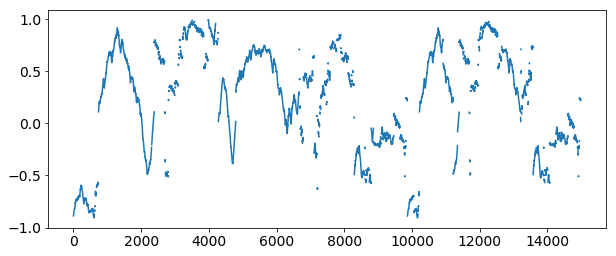

In [210]:
print coastpoints[0,:]
fig, ax = plt.subplots(1,1)
ax.plot(coastpoints[1,:])

[0.9012756679011654, 0.0, -0.433246085324851]
[0.9012756679011654, 0.0, -0.433246085324851]


ValueError: could not convert string to float: 

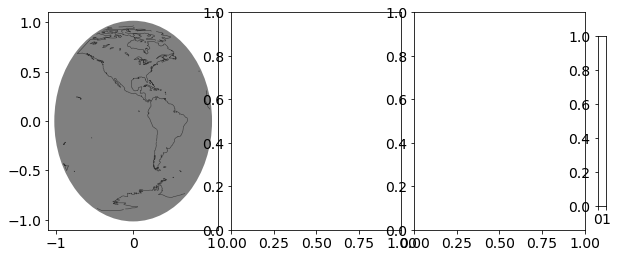

In [216]:
# Plot it!

os.chdir(project_root)
H_IONO=2000
clims=[-1,5]
Kp = 4
# Get direction to sun (GSE system - x axis points to sun)
x_in = [1, 0, 0]
sun = xf.gse2sm(x_in, ray_datenum)
# sun = xf.sm2mag(tmp, ray_datenum)
print tmp
print sun
# --------------- Latex Plot Beautification --------------------------
fig_width = 9  # width in inches
fig_height = 3      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

# fig, ax = plt.subplots(1,3)
fig = plt.figure()
gs = gridspec.GridSpec(3,4, width_ratios=[1,1,1,0.05], height_ratios = [0.1,1,0.1])
gs.update(wspace=0.1, hspace=0.1) # set the spacing between axes.
ax = []
ax.append(plt.subplot(gs[:,0]))
ax.append(plt.subplot(gs[:,1]))
ax.append(plt.subplot(gs[:,2]))
cax = plt.subplot(gs[1,3])
p = []
for ind, plane in enumerate(planes):

    earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100, linewidth=3)
    iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='k',alpha=0.8, zorder=99)
    ax[ind].add_patch(earth)   
    ax[ind].add_patch(iono)

# Load coastlines (for plotting)
    with gzip.open('python_local/mag_coastlines.gzip','rb') as file:
        coast = pickle.load(file)
    coastpoints = np.vstack([coast['lon']/90. + 0.3, coast['lat']/90.])
    coastr = np.linalg.norm(coastpoints, axis=0)
    coastmask = (coastr < 1) | (np.isnan(coastr))
    ax[ind].plot(coastpoints[0,coastmask], coastpoints[1,coastmask],'k', zorder=101, alpha=0.6, linewidth=0.5)


    
    
    
    model_outfile='model_dump_mode%d_Kp%d_%s_%d_%s.dat'%(modelnum, Kp, yearday, milliseconds_day, plane)
    d = readdump(model_outfile)

    Ne = d['Ns'][0,:,:,:].squeeze().T*1e-6
    Ne[np.isnan(Ne)] = 0

    # Plot direction to the sun
    if plane == 'XY':
        sv = [sun[0], sun[1]]
    if plane == 'XZ':
        sv = [sun[0], sun[2]]
    if plane == 'YZ':
        sv = [sun[1], sun[2]]
    ax[ind].plot([0, sv[0]], [0, sv[1]],'w', linewidth=2, zorder=101)




    px = np.linspace(-maxD, maxD, 200)
    py = np.linspace(-maxD, maxD, 200)
#     p.append(ax[ind].pcolormesh(px, py, np.log10(Ne), zorder=98, cmap=plt.get_cmap('jet')))

    # Interpolate onto a finer axis for pretty plotting:
    pint = interpolate.RegularGridInterpolator([px, py], np.log10(Ne))
    pxi = np.linspace(-maxD, maxD, 500)
    pyi = np.linspace(-maxD, maxD, 500)
    pxim, pyim = np.meshgrid(pxi, pyi)
    pz = pint((pyim.ravel(), pxim.ravel()))
    pz = pz.reshape(500,500)
    p.append(ax[ind].pcolormesh(pxi, pyi, pz, zorder=98, cmap=plt.get_cmap('viridis')))

    p[ind].set_clim(clims)


    ax[ind].set_aspect('equal')
    ax[ind].set_xlim(xlims)
    ax[ind].set_ylim(ylims)
    ax[ind].set_title('%s'%plane)

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right",size="4%",pad=0.15)
cb = plt.colorbar(p[2], cax=cax)

cb.set_label('Electron Density (#/cm$^3$)')
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)

ax[1].set_xlabel('L (R$_E$)')
ax[0].set_ylabel('L (R$_E$)')
ax[1].set_yticks([])
ax[2].set_yticks([])

figname='plasmasphere_mode%d_kp%d_%s_%d.png'%(modelnum, Kp, yearday, milliseconds_day)
fig.savefig(figname, dpi=150)
# fig.suptitle('Mode: %d %s Kp: %d - Dst: %d\n '%(modelnum, ray_datenum, Kp, Dst))

# fig.tight_layout()
# gs.tight_layout(fig)



# plt.close('all')



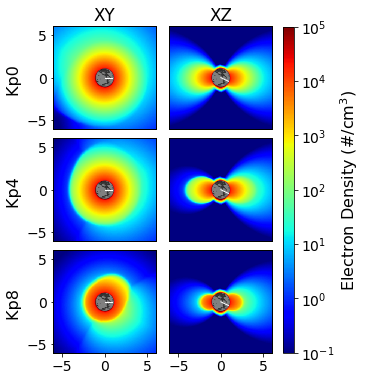

In [47]:
# Big ol' grid:
# --------------- Latex Plot Beautification --------------------------
fig_width = 4  # width in inches
fig_height = 5      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 16,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------
H_IONO=2000
clims=[-1,5]
maxD = 6
xlims = [-maxD, maxD]
ylims = [-maxD, maxD]
# Kpvec = [0, 2, 4, 6, 8]
Kpvec = [0, 4, 8]
widths = np.ones(len(planes) + 1)
widths[-1] = 0.1
R_E = 6371

modelnum = 6
use_IGRF = 0
maxD = 8
R_E = 6371
ray_datenum = datetime.datetime(2010,1,1,0,0,0)
yearday = '%d%03d'%(ray_datenum.year, ray_datenum.timetuple().tm_yday)
milliseconds_day = (ray_datenum.second + ray_datenum.minute*60 + ray_datenum.hour*60*60)*1e3 + ray_datenum.microsecond*1e-3








planes = ['XY','XZ']

x_in = [1, 0, 0]
sun = xf.gse2sm(x_in, ray_datenum)

fig = plt.figure()
# gs = gridspec.GridSpec(len(planes),len(Kpvec)+1,width_ratios=widths )
gs = gridspec.GridSpec(3,3,width_ratios=widths )

gs.update(wspace=0.1, hspace=0.1) # set the spacing between axes.
ax = []
for k_ind, k in enumerate(Kpvec):
    ax.append(plt.subplot(gs[k_ind,0]))
    ax.append(plt.subplot(gs[k_ind,1]))

cax = plt.subplot(gs[:,-1])

# reshape ax ~ [kp, row]
ax = np.array(ax).reshape(len(Kpvec), len(planes))


# Load coastlines (for plotting)
with gzip.open('python_local/mag_coastlines.gzip','rb') as file:
    coast = pickle.load(file)
coastpoints = np.vstack([coast['lon']/90. + 0.3, coast['lat']/90.])
coastr = np.linalg.norm(coastpoints, axis=0)
coastmask = (coastr < 1) | (np.isnan(coastr))

p = []
# Do the things
for k_ind, Kp in enumerate(Kpvec):
    for p_ind, plane in enumerate(planes):
        [j.set_linewidth(2) for j in ax[k_ind, p_ind].spines.itervalues()]  # Thick borders


        # Earth circle
        earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
        iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='k',alpha=0.8, zorder=99)
        ax[k_ind, p_ind].add_patch(earth)   
        ax[k_ind, p_ind].add_patch(iono)
        
        # Coastlines
        ax[k_ind, p_ind].plot(coastpoints[0,coastmask], coastpoints[1,coastmask],'k', zorder=101, alpha=0.6, linewidth=0.5)


        model_outfile='model_dump_mode%d_Kp%d_%s_%d_%s.dat'%(modelnum, Kp, yearday, milliseconds_day, plane)
        d = readdump(model_outfile)

        Ne = d['Ns'][0,:,:,:].squeeze().T*1e-6
        Ne[np.isnan(Ne)] = 0

        # Plot direction to the sun
        if plane == 'XY':
            sv = [sun[0], sun[1]]
        if plane == 'XZ':
            sv = [sun[0], sun[2]]
        if plane == 'YZ':
            sv = [sun[1], sun[2]]
        ax[k_ind, p_ind].plot([0, sv[0]], [0, sv[1]],'w', linewidth=1, zorder=101)




        px = np.linspace(-maxD, maxD, 200)
        py = np.linspace(-maxD, maxD, 200)

        # Interpolate onto a finer axis for pretty plotting:
        pint = interpolate.RegularGridInterpolator([px, py], np.log10(Ne))
        pxi = np.linspace(-maxD, maxD, 500)
        pyi = np.linspace(-maxD, maxD, 500)
        pxim, pyim = np.meshgrid(pxi, pyi)
        pz = pint((pyim.ravel(), pxim.ravel()))
        pz = pz.reshape(500,500)
#         p.append(ax[k_ind, p_ind].pcolormesh(pxi, pyi, pz, zorder=98, cmap=plt.get_cmap('jet')))
        p.append(ax[k_ind, p_ind].pcolormesh(pxi, pyi, pz, zorder=98, cmap=plt.get_cmap('jet')))


        p[-1].set_clim(clims)


        ax[k_ind, p_ind].set_aspect('equal')
        ax[k_ind, p_ind].set_xlim(xlims)
        ax[k_ind, p_ind].set_ylim(ylims)




cb = plt.colorbar(p[-1], cax=cax)

cb.set_label('Electron Density (#/cm$^3$)')
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)


    
# for k_ind in range(1, len(Kpvec)):
#     ax[0,k_ind].set_yticks([])
#     ax[k_ind].set_yticks([])
#     ax[k_ind,2].set_yticks([])
for k_ind in range(len(Kpvec)-1):
    ax[k_ind,0].set_xticks([])
    ax[k_ind,1].set_xticks([])

for k_ind in range(len(Kpvec)):
    for p_ind in range(1,len(planes)):
        ax[k_ind, p_ind].set_yticks([])
    ax[k_ind, 0].set_ylabel('Kp%d '%Kpvec[k_ind]) #, rotation='horizontal'
    
for p_ind, plane in enumerate(planes):
    ax[0,p_ind].set_title(plane)

    
#     ax[k_ind,0].set_ylabel('Kp%d'%Kp)
# ax[0,0].set_ylabel(planes[0])
# ax[0,1].set_ylabel(planes[1])
# # ax[0,2].set_ylabel('YZ')
# # ax[len(Kpvec)/2,2].set_xlabel('R$_e$')

fig.subplots_adjust(right=0.8)
fig.savefig('plasma_model_grid_2up.png',dpi=150)

In [163]:
for k_ind in range(1, len(Kpvec)):
    ax[k_ind,0].set_yticks([])
    ax[k_ind,1].set_yticks([])
    ax[k_ind,2].set_yticks([])
        

In [112]:
coastlines = scipy.io.loadmat('coastlines.mat')
print coastlines.keys()


['lat', '__version__', '__header__', 'long', '__globals__']


## Plot a comparison of the three plasmasphere models side by side

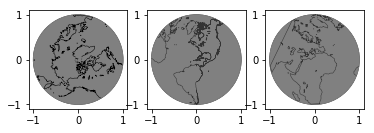

In [191]:
''' This block loads the matlab coastline file (in magnetic coordinates), and generates
    polar and equatorial views. Details! '''

# Load coastlines (for plotting)
with gzip.open('python_local/mag_coastlines.gzip','rb') as file:
    coast = pickle.load(file)
coastpoints = np.vstack([coast['lon'], coast['lat']])

coastr = np.linalg.norm(coastpoints, axis=0)
coastmask = (coastr < 90.) | (np.isnan(coastr))


## ---- Polar view ----
centerpoint = [0,90] # longitude, latitude

# distance from centerpoint in earth radii (haversine formula)
dlat = coastpoints[1,:] -centerpoint[1]
dlon = coastpoints[0,:] -centerpoint[0]
clat1 = np.cos(D2R*coastpoints[1,:])
clat2 = np.cos(D2R*centerpoint[1])
a = pow(np.sin(D2R*dlat/2.0),2)
b = (clat1*clat2*pow(np.sin(D2R*dlon/2.0),2))
gc_distance = 2.0* np.arcsin(np.sqrt(a + b)) 

maxdist = 0.8

np_mask = ( (np.abs(gc_distance) < maxdist) & (coastpoints[0,:] < 180.)) | np.isnan(gc_distance)

XYcoast = np.vstack([gc_distance[np_mask]*np.cos(coastpoints[0,np_mask]*D2R)/maxdist,
                      gc_distance[np_mask]*np.sin(coastpoints[0,np_mask]*D2R)/maxdist])

## ---- Solar plane view ----
centerpoint = [0,30] # longitude, latitude

# distance from centerpoint in earth radii (haversine formula)
dlat = coastpoints[1,:] -centerpoint[1]
dlon = coastpoints[0,:] -centerpoint[0]
clat1 = np.cos(D2R*coastpoints[1,:])
clat2 = np.cos(D2R*centerpoint[1])
a = pow(np.sin(D2R*dlat/2.0),2)
b = (clat1*clat2*pow(np.sin(D2R*dlon/2.0),2))
gc_distance = 2.0* np.arcsin(np.sqrt(a + b)) 

maxdist = 1.3

ta = centerpoint[1]
tb = coastpoints[1,:]
dl = coastpoints[0,:] - centerpoint[0]
X = np.cos(D2R*tb)*np.sin(D2R*dl)
Y = np.cos(D2R*ta)*np.sin(D2R*tb) - np.sin(D2R*ta)*np.cos(D2R*tb)*np.cos(D2R*dl)
beta = np.arctan2(X,Y) + np.pi/2.

np_mask = (np.abs(gc_distance) < maxdist) | np.isnan(gc_distance)
XZcoast = np.vstack([gc_distance[np_mask]*np.cos(beta[np_mask])/maxdist,
                      gc_distance[np_mask]*np.sin(beta[np_mask])/maxdist])

## ---- Perpendicular plane view ----
centerpoint = [90,30] # longitude, latitude

# distance from centerpoint in earth radii (haversine formula)
dlat = coastpoints[1,:] -centerpoint[1]
dlon = coastpoints[0,:] -centerpoint[0]
clat1 = np.cos(D2R*coastpoints[1,:])
clat2 = np.cos(D2R*centerpoint[1])
a = pow(np.sin(D2R*dlat/2.0),2)
b = (clat1*clat2*pow(np.sin(D2R*dlon/2.0),2))
gc_distance = 2.0* np.arcsin(np.sqrt(a + b)) 

maxdist = 1.1

ta = centerpoint[1]
tb = coastpoints[1,:]
dl = coastpoints[0,:] - centerpoint[0]
X = np.cos(D2R*tb)*np.sin(D2R*dl)
Y = np.cos(D2R*ta)*np.sin(D2R*tb) - np.sin(D2R*ta)*np.cos(D2R*tb)*np.cos(D2R*dl)
beta = np.arctan2(X,Y) + np.pi/2.

np_mask = (np.abs(gc_distance) < maxdist) | np.isnan(gc_distance)
YZcoast = np.vstack([gc_distance[np_mask]*np.cos(beta[np_mask])/maxdist,
                      gc_distance[np_mask]*np.sin(beta[np_mask])/maxdist])





# ## ---- test plot ----
fig, ax = plt.subplots(1,3)
# Earth circle
earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='k',alpha=0.8, zorder=99)
ax[0].add_patch(earth)   
ax[0].add_patch(iono)
ax[0].plot(XYcoast[0,:], XYcoast[1,:],'k', zorder=101, alpha=1, linewidth=0.5)

earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='k',alpha=0.8, zorder=99)
ax[1].add_patch(earth)   
ax[1].add_patch(iono)
ax[1].plot(XZcoast[0,:], XZcoast[1,:],'k', zorder=101, alpha=0.6, linewidth=0.5)

earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='k',alpha=0.8, zorder=99)
ax[2].add_patch(earth)   
ax[2].add_patch(iono)
ax[2].plot(YZcoast[0,:], YZcoast[1,:],'k', zorder=101, alpha=0.6, linewidth=0.5)





ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')

fig.savefig('sweet_earths.pdf')


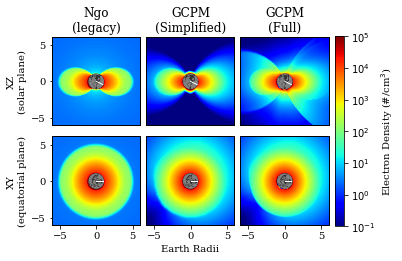

In [200]:
# Big ol' grid:
# --------------- Latex Plot Beautification --------------------------
fig_width = 5  # width in inches
fig_height = 2.5      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'font.family': 'serif',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------


os.chdir(project_root)
H_IONO=2000
clims=[-1,5]
maxD = 6
xlims = [-maxD, maxD]
ylims = [-maxD, maxD]
# Kpvec = [0, 2, 4, 6, 8]
# Kpvec = [0, 4, 8]
Kp = 2

R_E = 6371

maxD = 8
R_E = 6371
ray_datenum = datetime.datetime(2010,1,1,0,0,0)
yearday = '%d%03d'%(ray_datenum.year, ray_datenum.timetuple().tm_yday)
milliseconds_day = (ray_datenum.second + ray_datenum.minute*60 + ray_datenum.hour*60*60)*1e3 + ray_datenum.microsecond*1e-3



planes = ['XZ','XY']
modes = [1,6,2]
widths = np.ones(len(modes) + 1)
widths[-1] = 0.1

x_in = [1, 0, 0]
sun = xf.gse2sm(x_in, ray_datenum)

fig = plt.figure()
# gs = gridspec.GridSpec(len(planes),len(Kpvec)+1,width_ratios=widths )
gs = gridspec.GridSpec(len(planes),len(modes)+1,width_ratios=widths )

gs.update(wspace=0.1, hspace=0.1) # set the spacing between axes.
ax = []
for p_ind, plane in enumerate(planes):
    for mode_ind, mode in enumerate(modes):
        ax.append(plt.subplot(gs[p_ind, mode_ind]))

cax = plt.subplot(gs[:,-1])

# reshape ax ~ [planes, modes]
ax = np.array(ax).reshape(len(planes), len(modes))

p = []
# Do the things
# for k_ind, Kp in enumerate(Kpvec):
for p_ind, plane in enumerate(planes):
    for mode_ind, mode in enumerate(modes):
        [j.set_linewidth(2) for j in ax[p_ind, mode_ind].spines.itervalues()]  # Thick borders


        # Earth circle
        earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
        iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='k',alpha=0.8, zorder=99)
        ax[p_ind, mode_ind].add_patch(earth)   
        ax[p_ind, mode_ind].add_patch(iono)

        # Coastlines
        if plane == 'XY':
            ax[p_ind, mode_ind].plot(XYcoast[0,:], XYcoast[1,:],'k', zorder=101, alpha=0.6, linewidth=0.25)
        if plane == 'XZ':
            ax[p_ind, mode_ind].plot(XZcoast[0,:], XZcoast[1,:],'k', zorder=101, alpha=0.6, linewidth=0.25)
        if plane == 'YZ':
            ax[p_ind, mode_ind].plot(YZcoast[0,:], YZcoast[1,:],'k', zorder=101, alpha=0.6, linewidth=0.25)


            
        model_outfile='model_dump_mode%d_Kp%d_%s_%d_%s.dat'%(mode, Kp, yearday, milliseconds_day, plane)
        d = readdump(model_outfile)

        Ne = d['Ns'][0,:,:,:].squeeze().T*1e-6
        Ne[np.isnan(Ne)] = 0

        # Plot direction to the sun
        if plane == 'XY':
            sv = [sun[0], sun[1]]
        if plane == 'XZ':
            sv = [sun[0], sun[2]]
        if plane == 'YZ':
            sv = [sun[1], sun[2]]
        ax[p_ind, mode_ind].plot([0, sv[0]], [0, sv[1]],'w', linewidth=1, zorder=101)




        px = np.linspace(-maxD, maxD, 200)
        py = np.linspace(-maxD, maxD, 200)

        # Interpolate onto a finer axis for pretty plotting:
        pint = interpolate.RegularGridInterpolator([px, py], np.log10(Ne))
        pxi = np.linspace(-maxD, maxD, 1000)
        pyi = np.linspace(-maxD, maxD, 1000)
        pxim, pyim = np.meshgrid(pxi, pyi)
        pz = pint((pyim.ravel(), pxim.ravel()))
        pz = pz.reshape(1000,1000)
    #         p.append(ax[k_ind, p_ind].pcolormesh(pxi, pyi, pz, zorder=98, cmap=plt.get_cmap('jet')))
        p.append(ax[p_ind, mode_ind].pcolormesh(pxi, pyi, pz, zorder=98, cmap=plt.get_cmap('jet')))


        p[-1].set_clim(clims)


        ax[p_ind, mode_ind].set_aspect('equal')
        ax[p_ind, mode_ind].set_xlim(xlims)
        ax[p_ind, mode_ind].set_ylim(ylims)




cb = plt.colorbar(p[-1], cax=cax)

cb.set_label('Electron Density (#/cm$^3$)')
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)



for mode_ind in range(len(modes)):
    ax[0,mode_ind].set_xticks([])

for mode_ind in range(1,len(modes)):
    for plane_ind in range(len(planes)):
#         print mode_ind, plane_ind
        ax[plane_ind, mode_ind].set_yticks([])
        
ax[0,0].set_title('Ngo\n(legacy)')
ax[0,1].set_title('GCPM\n(Simplified)')
ax[0,2].set_title('GCPM\n(Full)')

ax[0,0].set_ylabel('XZ\n(solar plane)')
ax[1,0].set_ylabel('XY\n(equatorial plane)')

ax[1,1].set_xlabel('Earth Radii')
# for mode_ind in range(len(modes)-1):
#     ax[0,mode_ind].set_xticks([])

# for k_ind in range(len(Kpvec)):
#     for p_ind in range(1,len(planes)):
#         ax[k_ind, p_ind].set_yticks([])
#     ax[k_ind, 0].set_ylabel('Kp%d '%Kpvec[k_ind]) #, rotation='horizontal'
    
# for p_ind, plane in enumerate(planes):
#     ax[0,p_ind].set_title(plane)

fig.subplots_adjust(right=0.8)
fig.savefig('plasma_model_comparison.png',dpi=300)

In [196]:
print plt.rcParams.get('font.family')

[u'sans-serif']
